# **Problem Statement:**
A new football club named ‘GL United FC’ has just been inaugurated. This club
does not have a team yet. The team is looking to hire players for their roster.
Management wants to make such decisions using a data based approach.
During a recent hiring drive, you were selected for the Data Science team as a
data scientist. Your team has been tasked with creating a report which
recommends players for the main team. To start with, a total of 15 players are
required. Player data for all teams has been acquired from FIFA. This data
contains information about the players, the clubs they are currently playing for
and various performance measures. The team needs 20 possible players to
choose from. You have been requested to do the analysis and formulate a
report in order to help the management make a decision regarding potential
players.

### Objective
* Working with data using python libraries.
* Data Visualization.
* Exploratory data analysis and Data Preprocessing.

### Dataset Description:
The data contains details for over 18,000 players playing in various football
clubs in Europe. It contains information on age, skill rating, wages and player
value, etc. The files provided are as follows:
* fifa.csv – data file.
* fifa_ variable_information.csv - information on individual variables.

## **Importing all required Libaries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier

## **Loading the dataset**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fifa.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
# second data set
fifaVar = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fifa_ variable_information.csv')
fifaVar.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


### **2. Check the first few samples, shape, info of the data**

In [4]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
df.sample(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
14083,203569,J. Chianese,28,https://cdn.sofifa.org/players/4/19/203569.png,Australia,https://cdn.sofifa.org/flags/195.png,61,61,Perth Glory,https://cdn.sofifa.org/teams/2/light/111399.png,...,59.0,30.0,34.0,45.0,15.0,16.0,7.0,10.0,9.0,€313K
458,205114,T. Inui,30,https://cdn.sofifa.org/players/4/19/205114.png,Japan,https://cdn.sofifa.org/flags/163.png,80,80,Real Betis,https://cdn.sofifa.org/teams/2/light/449.png,...,76.0,65.0,39.0,31.0,11.0,12.0,11.0,15.0,8.0,€29.4M
15250,230124,R. Escobar,20,https://cdn.sofifa.org/players/4/19/230124.png,Chile,https://cdn.sofifa.org/flags/55.png,60,75,Audax Italiano,https://cdn.sofifa.org/teams/2/light/101097.png,...,48.0,57.0,63.0,49.0,6.0,10.0,13.0,12.0,13.0,€839K
9118,231500,D. Widgren,24,https://cdn.sofifa.org/players/4/19/231500.png,Sweden,https://cdn.sofifa.org/flags/46.png,66,70,Östersunds FK,https://cdn.sofifa.org/teams/2/light/113173.png,...,63.0,63.0,63.0,59.0,6.0,7.0,5.0,8.0,8.0,€928K
7044,205674,Fran Carbia,26,https://cdn.sofifa.org/players/4/19/205674.png,Spain,https://cdn.sofifa.org/flags/45.png,68,69,CF Reus Deportiu,https://cdn.sofifa.org/teams/2/light/110854.png,...,59.0,58.0,20.0,23.0,15.0,13.0,9.0,9.0,12.0,€1.7M


In [6]:
fifaVar.sample(5)

,ID,unique id for every player
33,BallControl,rating on scale of 100
36,Agility,rating on scale of 100
15,Work Rate,attack work rate/defence work rate
13,Weak Foot,rating on scale of 5
38,Balance,rating on scale of 100


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [8]:
fifaVar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          59 non-null     object
 1   unique id for every player  59 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


In [9]:
df.shape

(18207, 60)

In [10]:
fifaVar.shape

(59, 2)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0
Crossing,18159.0,49.734181,18.364524,5.0,38.0,54.0,64.0,93.0
Finishing,18159.0,45.550911,19.525820,2.0,30.0,49.0,62.0,95.0


### **Dropping Redundant columns**

In [12]:
# dropping the above five categorical columns, which are redundant for our analysis.
df.drop(['Photo','Flag','Club Logo','Loaned From','Body Type','Jersey Number'], axis=1, inplace=True)

In [13]:
df.shape

(18207, 54)

# **Data Preprocessing**

### **Convert the columns "Value", "Wage", "Release Clause" to float datatype after getting rid of currency symbol and suffix.**
* When the record/entry has "M"(indicates millions) as suffix you need to multiply that value with 1000000
* When the record/entry has "K"(indicates thousands) as suffix you need to multiply that value with 1000

In [14]:
## Just checking some samples.
df[['Value','Wage','Release Clause']].sample(4)

,Value,Wage,Release Clause
15185,€190K,€3K,€333K
3429,€3.5M,€1K,€7.7M
4950,€550K,€7K,€770K
12385,€190K,€1K,€238K


In [15]:
#  function to clean 'Value','Wage','Release Clause' columns
def convert(value):
    # Check for missing or NaN values
    if pd.isna(value):
        return 0  # Return 0 for missing values
    value = value.replace('€', '')  # Remove the € symbol
    # Handle 'K' and 'M' suffixes
    if value.endswith('K'):
        return float(value.replace('K', '')) * 1000
    elif value.endswith('M'):
        return float(value.replace('M', '')) * 1000000
    else:
        return float(value)  # Handle values without 'K' or 'M'

In [16]:
# Apply the function to each column
columns_to_clean = ['Value', 'Wage', 'Release Clause']
for col in columns_to_clean:
    df[col] = df[col].apply(convert)

In [17]:
df[['Value','Wage','Release Clause']].sample(4)

,Value,Wage,Release Clause
8402,825000.0,4000.0,1000000.0
7131,725000.0,3000.0,979000.0
9573,625000.0,1000.0,891000.0
3074,3100000.0,6000.0,3900000.0


In [18]:
df[['Value','Wage','Release Clause']].head()

,Value,Wage,Release Clause
0,110500000.0,565000.0,226500000.0
1,77000000.0,405000.0,127100000.0
2,118500000.0,290000.0,228100000.0
3,72000000.0,260000.0,138600000.0
4,102000000.0,355000.0,196400000.0


### **Convert the column "Joined" into integer datatype with keeping only the year.**

In [19]:
df['Joined'].head()

,Joined
0,"Jul 1, 2004"
1,"Jul 10, 2018"
2,"Aug 3, 2017"
3,"Jul 1, 2011"
4,"Aug 30, 2015"


In [20]:
df['Joined'] = df['Joined'].str.split(',').str.get(1).fillna(0).astype(int)

In [21]:
df['Joined'].head()

,Joined
0,2004
1,2018
2,2017
3,2011
4,2015


### **Convert the column "Contract Valid Until" to pandas datetime type.**

In [22]:
df['Contract Valid Until'].unique()

array(['2021', '2022', '2020', '2023', '2019', '2024', 'Jun 30, 2019',
       '2025', '2026', 'Dec 31, 2018', '2018', nan, 'May 31, 2020',
       'Jun 30, 2020', 'May 31, 2019', 'Dec 31, 2019', 'Jan 1, 2019',
       'Jun 1, 2019', 'Jan 4, 2019', 'Jan 31, 2019', 'Jan 7, 2019',
       'Jan 2, 2019', 'Jan 6, 2019', 'Oct 14, 2019', 'Jan 3, 2019',
       'May 4, 2019', 'Jan 12, 2019', 'Jan 25, 2019', 'Jan 18, 2019',
       'Dec 1, 2019', 'Nov 30, 2018', 'Feb 27, 2020', 'Jan 5, 2019',
       'Jan 15, 2019', 'Jan 30, 2019', 'Jan 11, 2019', 'Jan 20, 2019'],
      dtype=object)

In [23]:
## converting into pandas datetime format.
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'],format='mixed', errors='coerce')

In [24]:
df['Contract Valid Until'].sample(5)

,Contract Valid Until
14869,2019-01-01
180,2024-01-01
12926,2021-01-01
5148,2020-01-01
4364,2019-01-01


### **The column 'Height' is in inches with a quotation, Convert to float with decimal points.**

In [25]:
df['Height'].head()

,Height
0,5'7
1,6'2
2,5'9
3,6'4
4,5'11


In [26]:
# convert_height
def convert_height(x):
  if x is not None:
    return float(str(x).replace("'","."))

In [27]:
# applying function to Height column
df['Height'] = df['Height'].apply(convert_height)

In [28]:
df['Height'].head()

,Height
0,5.70
1,6.20
2,5.90
3,6.40
4,5.11


### **The column "Weight" has suffix as lbs, remove the suffix and convert to float.**

In [29]:
df['Weight'].head()

,Weight
0,159lbs
1,183lbs
2,150lbs
3,168lbs
4,154lbs


In [30]:
# removing lbs from Weight
df['Weight'] = df['Weight'].fillna('0').apply(lambda x: x.replace('lbs','')).astype(float)

In [31]:
df['Weight'].head()

,Weight
0,159.0
1,183.0
2,150.0
3,168.0
4,154.0


### **Check for percentage of missing values and impute them with appropriate imputation techniques**

In [32]:
df.isnull().sum()/len(df)*100

,0
ID,0.000000
Name,0.000000
Age,0.000000
Nationality,0.000000
Overall,0.000000
Potential,0.000000
Club,1.323667
Value,0.000000
Wage,0.000000
Preferred Foot,0.263635


In [33]:
# missing values columns
missing_values = df.isnull().sum()/len(df)
missing_values

,0
ID,0.000000
Name,0.000000
Age,0.000000
Nationality,0.000000
Overall,0.000000
Potential,0.000000
Club,0.013237
Value,0.000000
Wage,0.000000
Preferred Foot,0.002636


In [34]:
## These are the index of both categorical columns as well as numerical columns having null values.
index = [i for i in missing_values[missing_values>0].index]

# seperating categorical and numerical columns
num_cols = [i for i in index if i in df.columns and df[i].dtype != object]
cat_cols = [i for i in index if i in df.columns and df[i].dtype == object]

## Filling the null values of the numerical columns with median computation
for cols in num_cols:
  df[cols] = df[cols].fillna(df[cols].median())

## Filling the null values of the categorical columns with median computation
for cols in num_cols:
  df[cols] = df[cols].fillna(df[cols].mode()[0])

In [35]:
# rechecking null values
df.isnull().sum()

,0
ID,0
Name,0
Age,0
Nationality,0
Overall,0
Potential,0
Club,241
Value,0
Wage,0
Preferred Foot,48


# **EDA**

### **Plot the distribution of Overall rating for all the players and write your findings**

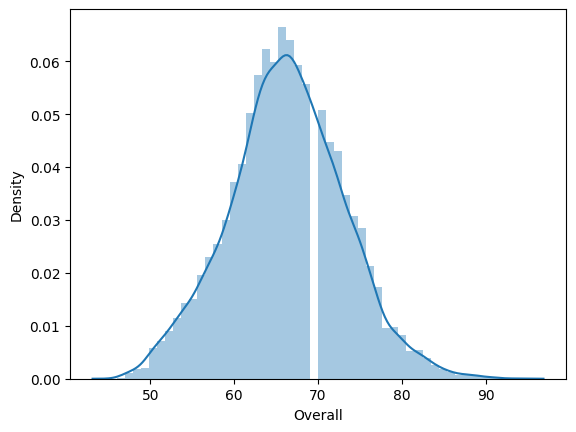

In [36]:
sns.distplot(df['Overall'])
plt.show()

* As we can observe from the above distribution plot, the overall rating ranges
from around 45-95.
* There are more number of players whose overall ratings is between 60-70.

### **Retrieve the names of top20 players based on the Overall rating**

In [37]:
top20_players = df.groupby('Name')['Overall'].max().sort_values(ascending = False).head(20)
top20_players

,Overall
Name,
Cristiano Ronaldo,94
L. Messi,94
Neymar Jr,92
Sergio Ramos,91
E. Hazard,91
De Gea,91
L. Suárez,91
L. Modrić,91
K. De Bruyne,91


### **Generate a dataframe which should include all the information of the Top20 players based on the Overall rating.**

In [38]:
Top20_df = df[(df['Name'].isin(top20_players.index)) & (df['Overall'].isin(top20_players.values))]
Top20_df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


### **What is the average "Age" and "Wage" of these top20 players?**

In [39]:
Top20_df[['Age','Wage']].mean()

,0
Age,28.9
Wage,301700.0


* The average age of the top20 players in around 30.
* The average wages given to the top20 players is around € 301700.0.

### **Among the top20 players based on the Overall rating, which player has the highest wage? Display the name of the player with his wage**

In [40]:
Top20_df[Top20_df['Wage'] == Top20_df['Wage'].max()][['Name','Wage']]

,Name,Wage
0,L. Messi,565000.0


### **Generate a dataframe which should include the "Player name", "Club Name", "Wage", and 'Overall rating'.**
i) find the average Overall rating for each club.
ii) Display the average overall rating of Top10 Clubs using a plot

In [41]:
df_14 = df[['Name','Club','Wage','Overall']]
df_14.head()

,Name,Club,Wage,Overall
0,L. Messi,FC Barcelona,565000.0,94
1,Cristiano Ronaldo,Juventus,405000.0,94
2,Neymar Jr,Paris Saint-Germain,290000.0,92
3,De Gea,Manchester United,260000.0,91
4,K. De Bruyne,Manchester City,355000.0,91


In [42]:
### Finding the average overall rating for each club
df_14.groupby('Club')['Overall'].mean()

,Overall
Club,
SSV Jahn Regensburg,65.586207
1. FC Heidenheim 1846,65.750000
1. FC Kaiserslautern,63.384615
1. FC Köln,70.785714
1. FC Magdeburg,65.615385
...,...
Zagłębie Sosnowiec,60.760000
Çaykur Rizespor,66.900000
Örebro SK,60.481481


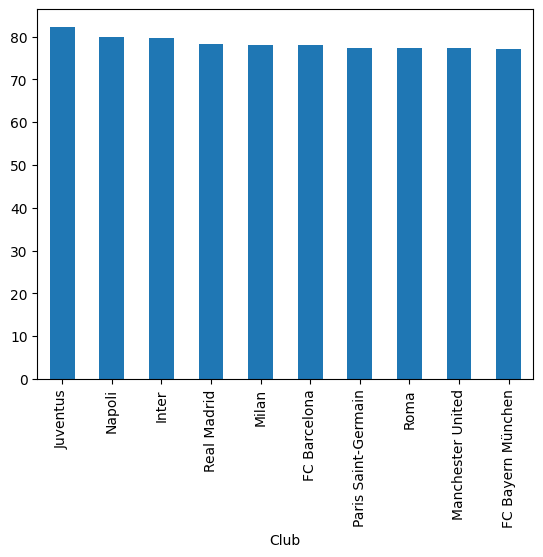

In [43]:
df_14.groupby('Club')['Overall'].mean().sort_values(ascending = False).head(10).plot(kind='bar')
plt.show()

### **What is the relationship between age and individual potential of the player? Visualize the relationship with appropriate plot**

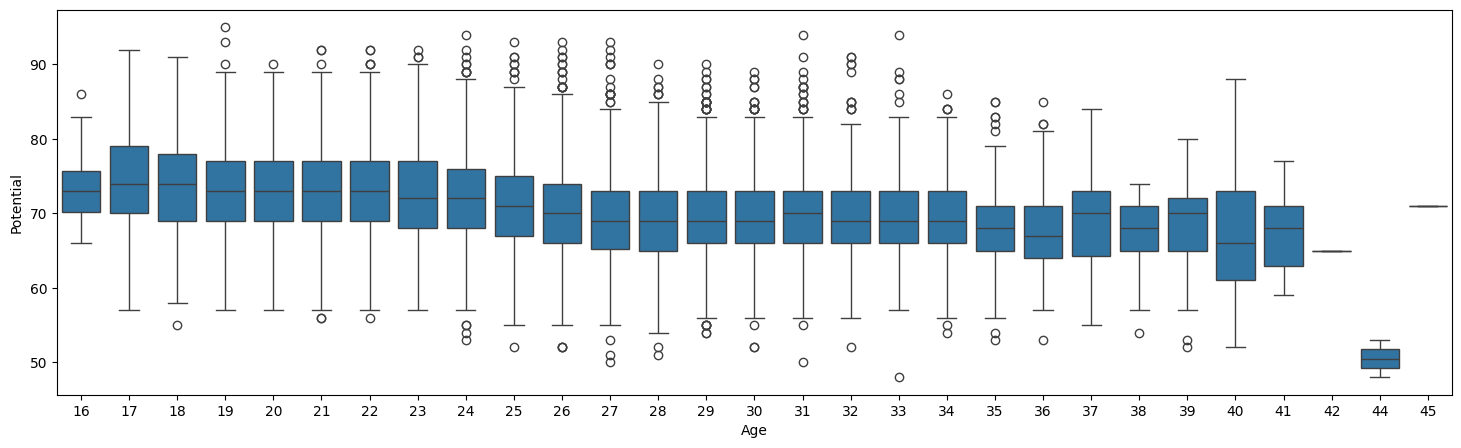

In [44]:
plt.figure(figsize=(18,5))
sns.boxplot(x=df['Age'], y=df['Potential'])
plt.show()

* We can observe that the Age is inversely proportional to the Potential of the player.
* A player shows average peak potential at the age of 17 and the maximum potential at the age of 19 which can be seen as an outlier in the boxplot.
* After that it decreases and remain almost the same till the age of 34. There are also a lot of outliers which indicates that despite being of higher ager, the player shows higher potential which is an exception for some cases.

### **Which features directly contribute to the wages of the players? Support your answer with a plot and a metric.**

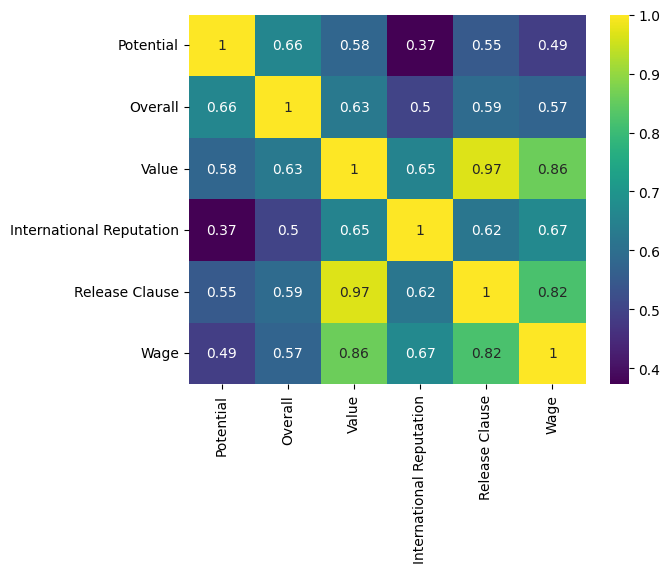

In [45]:
imp_features = df[['Potential','Overall','Value','International Reputation','Release Clause','Wage']]

sns.heatmap(imp_features.corr(), annot=True, cmap='viridis' )
plt.show()

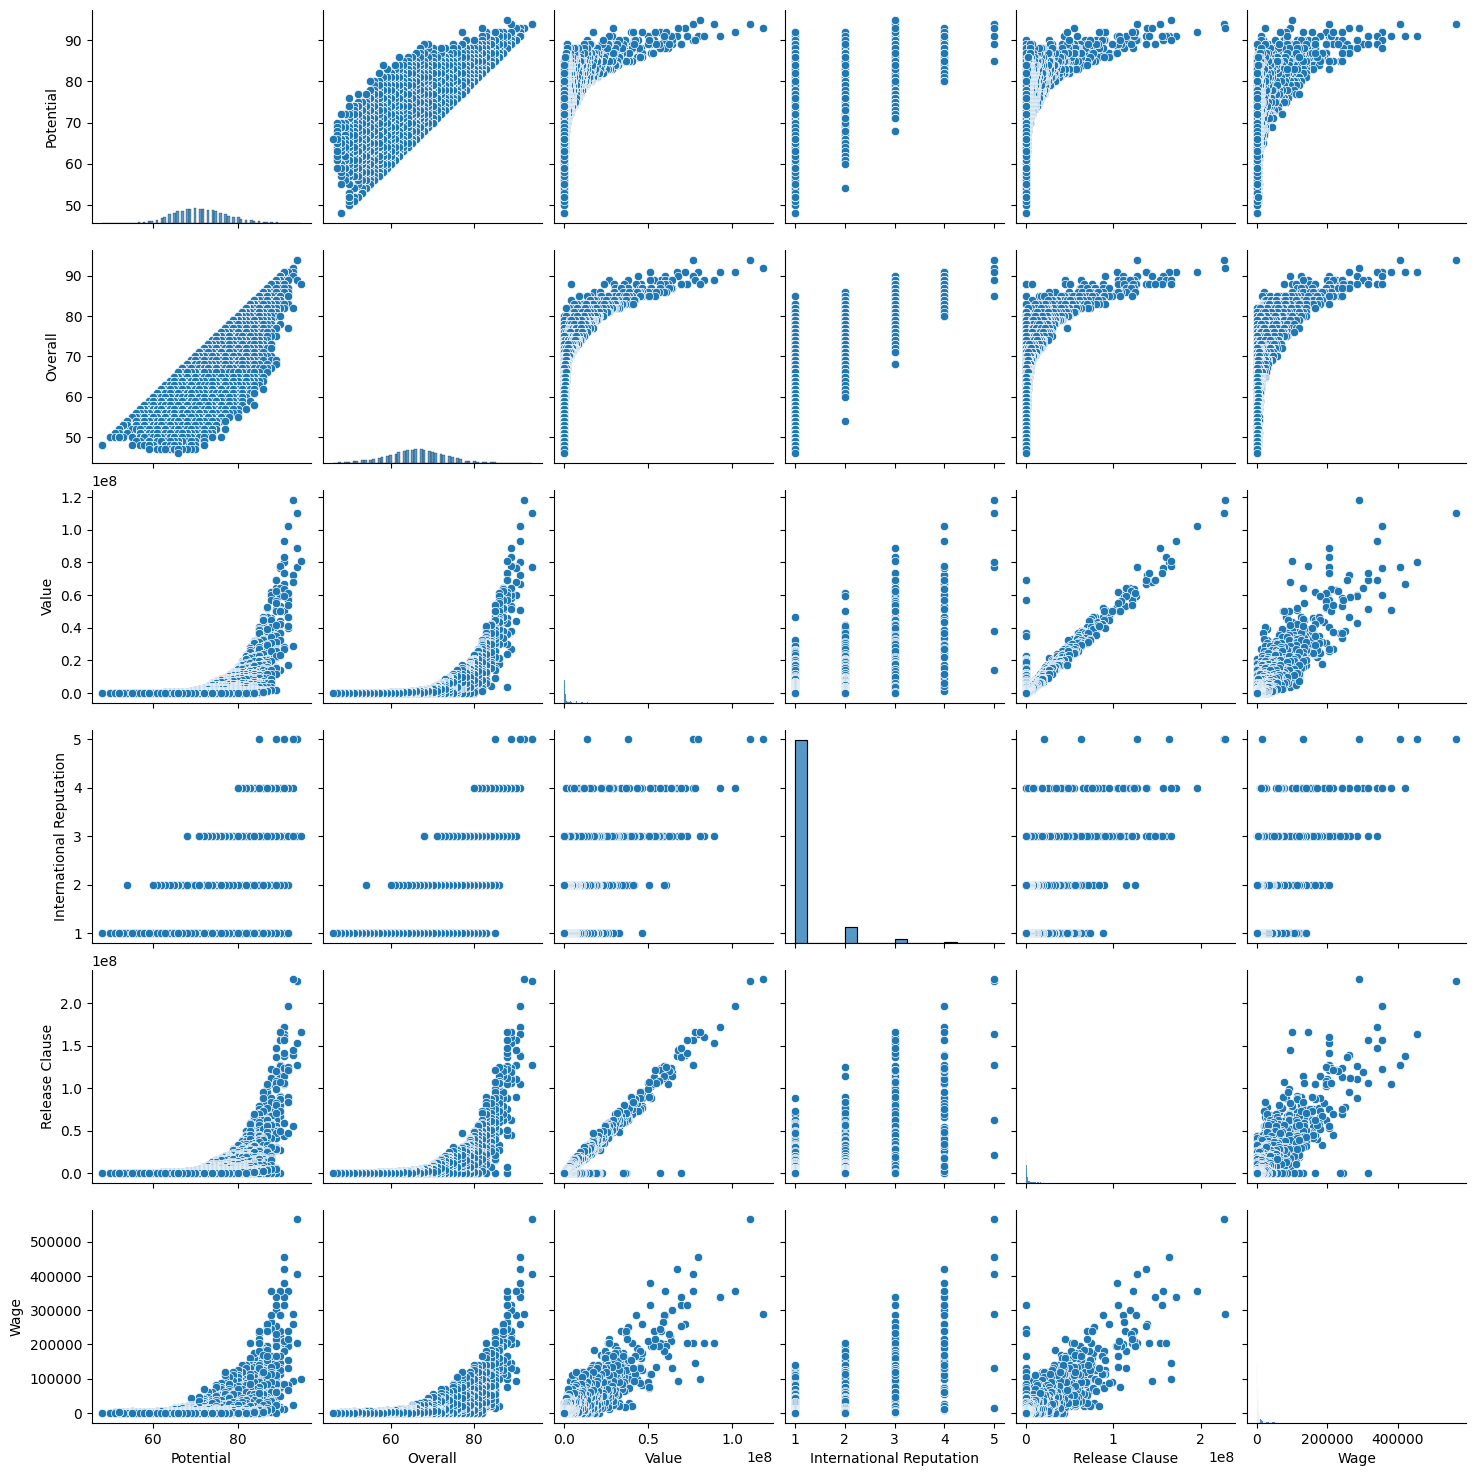

In [46]:
sns.pairplot(imp_features)
plt.show()

* As we can observe from the above heatmap and a pairplot.
* The Wage column has high positive correlation with the columns potential, Overall, Value, International reputation, and Release Clause.
* And from the pairplot we can see that when the potentional, overall, value, international reputation, and Release cause increases there is a significant increase in the wages of the players.

### **Find the position in the pitch where the maximum number of players play and the position where the minimum number of players play? Display it using a plot**

In [47]:
df['Position'].value_counts().sort_values(ascending=False).head(1)

,count
Position,
ST,2152


In [48]:
df['Position'].value_counts().sort_values(ascending=True).head(1)

,count
Position,
LF,15


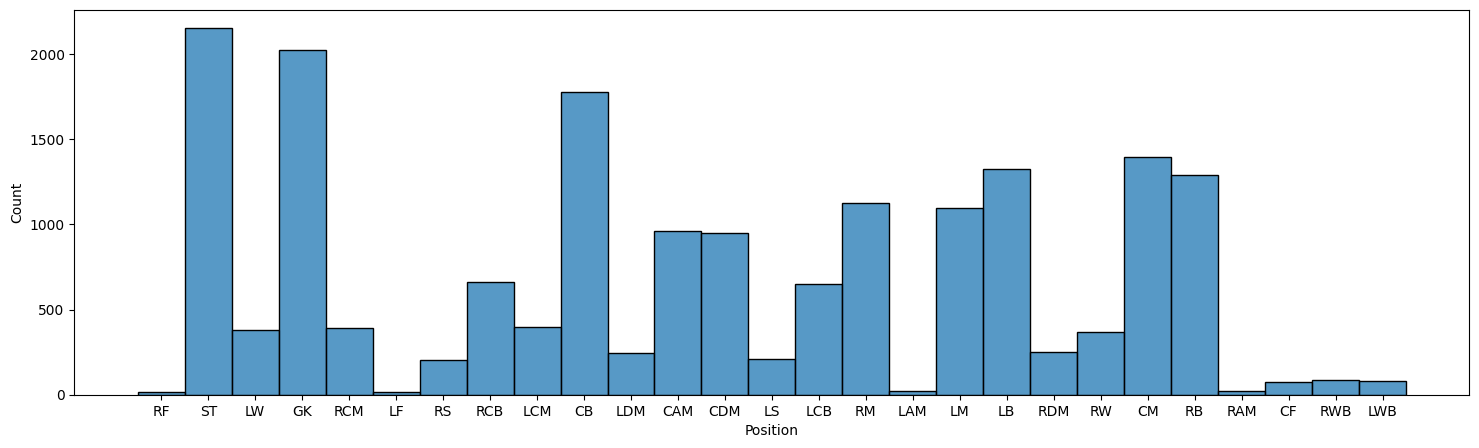

In [49]:
plt.figure(figsize=(18, 5))
sns.histplot(df['Position'])
plt.show()

* The maximum numner of players play in the position 'ST' (striker), around 2000 players.
* The mimimum number of players play in the position 'LF' (Left Forward), around 15 players.

### **How many players are from the club 'Juventus' and the wage is greater than 200K? Display all the information of such players**

In [50]:
df[(df['Club'] == 'Juventus') & (df['Wage'] > 200000)]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
15,211110,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,Left,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0


* There are 3 players from the club 'Juventus' and whose wage is greater than 200K

### **Generate a dataframe containing top 5 players by Overall rating for each unique positions**

In [51]:
top5 = df.groupby(['Position']).apply(lambda x: x.sort_values('Overall', ascending=False).head(5))
top5.head(10)

ID             Name  Age Nationality  Overall  Potential  \
Position                                                                     
CAM      17   194765     A. Griezmann   27      France       89         90   
         31   190460       C. Eriksen   26     Denmark       88         91   
         61   201942  Roberto Firmino   26      Brazil       86         87   
         66   189596        T. Müller   28     Germany       86         86   
         74   176635          M. Özil   29     Germany       86         86   
CB       12   182493         D. Godín   32     Uruguay       90         90   
         42   205600        S. Umtiti   24      France       87         92   
         73   177509       M. Benatia   31     Morocco       86         86   
         89   192366      N. Otamendi   30   Argentina       85         85   
         102  171919            Naldo   35      Brazil       85         85   

                           Club       Value      Wage Preferred Foot  ...  \
Position                                                              ...   
CAM      17     Atlético Madrid  78000000.0  145000.0           Left  ...   
         31   Tottenham Hotspur  73500000.0  205000.0          Right  ...   
         61           Liverpool  53000000.0  195000.0          Right  ...   
         66   FC Bayern München  45000000.0  135000.0          Right  ...   
         74             Arsenal  43500000.0  190000.0           Left  ...   
CB       12     Atlético Madrid  44000000.0  125000.0          Right  ...   
         42        FC Barcelona  57000000.0  205000.0           Left  ...   
         73            Juventus  30000000.0  160000.0          Right  ...   
         89     Manchester City  28500000.0  170000.0          Right  ...   
         102      FC Schalke 04   9000000.0   38000.0          Right  ...   

              Composure  Marking  StandingTackle SlidingTackle GKDiving  \
Position                                                                  
CAM      17        87.0     59.0            47.0          48.0     14.0   
         31        88.0     59.0            57.0          22.0      9.0   
         61        87.0     60.0            64.0          42.0      8.0   
         66        83.0     44.0            41.0          44.0      6.0   
         74        82.0     24.0            16.0          19.0      6.0   
CB       12        82.0     90.0            89.0          89.0      6.0   
         42        82.0     90.0            89.0          86.0     15.0   
         73        82.0     89.0            87.0          85.0      7.0   
         89        80.0     83.0            85.0          84.0     12.0   
         102       84.0     86.0            88.0          85.0     14.0   

              GKHandling GKKicking  GKPositioning  GKReflexes  Release Clause  
Position                                                                       
CAM      17          8.0      14.0           13.0        14.0     165800000.0  
         31         14.0       7.0            7.0         6.0     141500000.0  
         61         11.0       9.0            6.0        10.0     104700000.0  
         66          7.0      11.0           14.0        14.0      74300000.0  
         74         14.0      10.0            6.0        14.0      82700000.0  
CB       12          8.0      15.0            5.0        15.0      90200000.0  
         42         10.0      14.0           12.0        15.0     121100000.0  
         73          4.0       8.0            7.0        11.0      49500000.0  
         89          5.0       8.0           11.0        12.0      52700000.0  
         102        10.0      14.0            8.0        14.0      15300000.0  

[10 rows x 54 columns]

### **What is the average wage one can expect to pay for the top 5 in every position?**

In [52]:
top5['Wage'].groupby('Position').mean()

,Wage
Position,
CAM,174000.0
CB,139600.0
CDM,217000.0
CF,47400.0
CM,130600.0
GK,192800.0
LAM,81600.0
LB,177200.0
LCB,162000.0
